**Dataset**
This synthetic dataset captures customer interactions on an e-commerce platform.  
Each record represents a unique customer, with features supporting analysis of preferences, engagement, and satisfaction. Dataset is taken from [link](https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset/data). 

**Objectives**
- Conduct analyses of satisfaction level of customers of e-commerce shop
- Explore the dependence of customer satisfaction level on other parameters
- Additional exploratory data analysis

In [45]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [46]:
base_dir = kagglehub.dataset_download("uom190346a/e-commerce-customer-behavior-dataset")
file_path = os.path.join(base_dir, "E-commerce Customer Behavior - Sheet1.csv")
df = pl.read_csv(file_path)
print("Data frame shape:", df.shape)
df.head()

Data frame shape: (350, 11)


Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
i64,str,i64,str,str,f64,i64,f64,bool,i64,str
101,"""Female""",29,"""New York""","""Gold""",1120.2,14,4.6,true,25,"""Satisfied"""
102,"""Male""",34,"""Los Angeles""","""Silver""",780.5,11,4.1,false,18,"""Neutral"""
103,"""Female""",43,"""Chicago""","""Bronze""",510.75,9,3.4,true,42,"""Unsatisfied"""
104,"""Male""",30,"""San Francisco""","""Gold""",1480.3,19,4.7,false,12,"""Satisfied"""
105,"""Male""",27,"""Miami""","""Silver""",720.4,13,4.0,true,55,"""Unsatisfied"""


In [47]:
df.tail()

Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
i64,str,i64,str,str,f64,i64,f64,bool,i64,str
446,"""Male""",32,"""Miami""","""Silver""",660.3,10,3.8,true,42,"""Unsatisfied"""
447,"""Female""",36,"""Houston""","""Bronze""",470.5,8,3.0,false,27,"""Neutral"""
448,"""Female""",30,"""New York""","""Gold""",1190.8,16,4.5,true,28,"""Satisfied"""
449,"""Male""",34,"""Los Angeles""","""Silver""",780.2,11,4.2,false,21,"""Neutral"""
450,"""Female""",43,"""Chicago""","""Bronze""",515.75,10,3.3,true,49,"""Unsatisfied"""


In [48]:
numeric_columns = df.select(cs.numeric())
numeric_columns.describe()

statistic,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
str,f64,f64,f64,f64,f64,f64
"""count""",350.0,350.0,350.0,350.0,350.0,350.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",275.5,33.597143,845.381714,12.6,4.019143,26.588571
"""std""",101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
"""min""",101.0,26.0,410.8,7.0,3.0,9.0
"""25%""",188.0,30.0,500.75,9.0,3.5,15.0
"""50%""",276.0,33.0,780.2,12.0,4.1,23.0
"""75%""",363.0,37.0,1160.6,15.0,4.5,38.0
"""max""",450.0,43.0,1520.1,21.0,4.9,63.0


In [49]:
null_counts = df.null_count()
print("Null counts in each column:")
print(null_counts)
df = df.drop_nulls() # Drop rows with null values
duplicate_count = df.filter(df.is_duplicated()).height
print(f"Duplicate records: {duplicate_count}")

Null counts in each column:
shape: (1, 11)
┌─────────────┬────────┬─────┬──────┬───┬─────────┬──────────┬─────────────────┬──────────────┐
│ Customer ID ┆ Gender ┆ Age ┆ City ┆ … ┆ Average ┆ Discount ┆ Days Since Last ┆ Satisfaction │
│ ---         ┆ ---    ┆ --- ┆ ---  ┆   ┆ Rating  ┆ Applied  ┆ Purchase        ┆ Level        │
│ u32         ┆ u32    ┆ u32 ┆ u32  ┆   ┆ ---     ┆ ---      ┆ ---             ┆ ---          │
│             ┆        ┆     ┆      ┆   ┆ u32     ┆ u32      ┆ u32             ┆ u32          │
╞═════════════╪════════╪═════╪══════╪═══╪═════════╪══════════╪═════════════════╪══════════════╡
│ 0           ┆ 0      ┆ 0   ┆ 0    ┆ … ┆ 0       ┆ 0        ┆ 0               ┆ 2            │
└─────────────┴────────┴─────┴──────┴───┴─────────┴──────────┴─────────────────┴──────────────┘
Duplicate records: 0


In [50]:
print(df.group_by("Gender").len())

shape: (2, 2)
┌────────┬─────┐
│ Gender ┆ len │
│ ---    ┆ --- │
│ str    ┆ u32 │
╞════════╪═════╡
│ Female ┆ 173 │
│ Male   ┆ 175 │
└────────┴─────┘


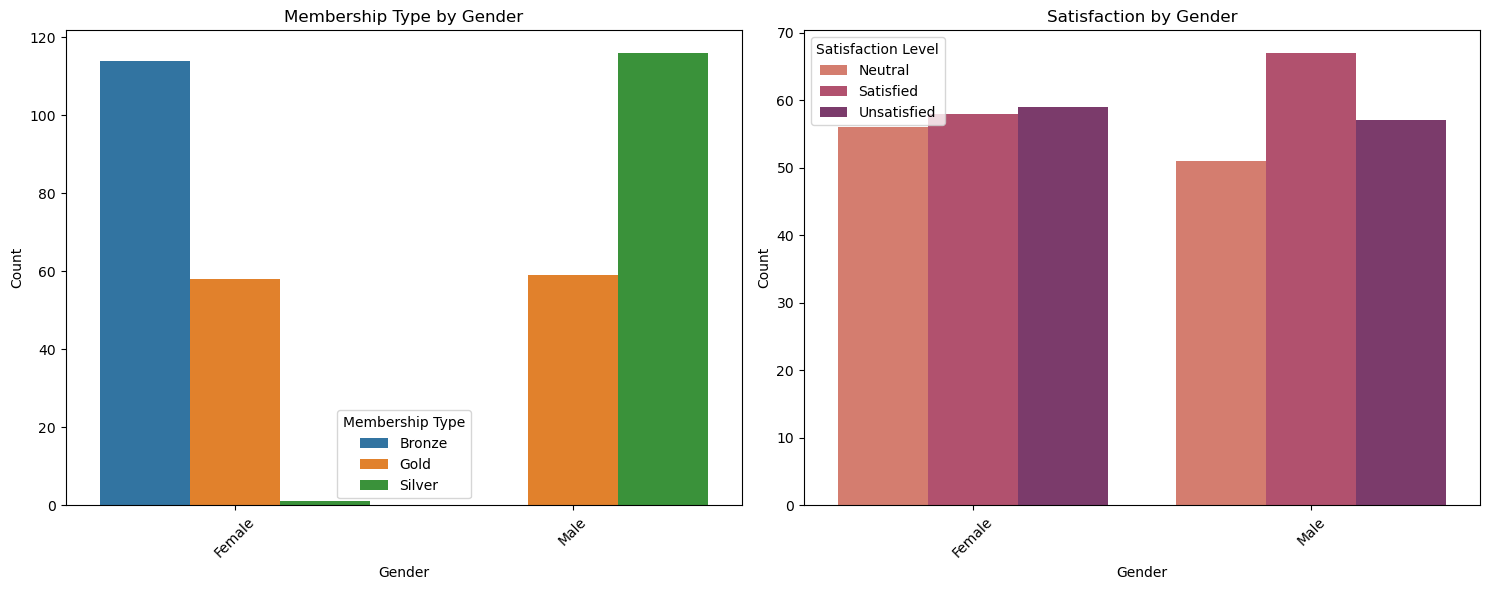

In [87]:
# Group by Gender and Membership Type
GenderWithMembershiptype = (
    df.group_by(["Gender", "Membership Type"])
    .agg(pl.len().alias("count"))
    .sort(["Gender", "Membership Type"])
)

# Group by Gender and Satisfaction Level
GenderWithSatisfactionlevel = (
    df.group_by(["Gender", "Satisfaction Level"])
    .agg(pl.len().alias("count"))
    .sort(["Gender", "Satisfaction Level"])
)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(data=GenderWithMembershiptype, x="Gender", y="count", hue="Membership Type", ax=axes[0])
axes[0].set_title("Membership Type by Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=GenderWithSatisfactionlevel, x="Gender", y="count", hue="Satisfaction Level", palette="flare", ax=axes[1])
axes[1].set_title("Satisfaction by Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Observation:** Male customers tend to have better plan. Male customers exhibit a small tendency toward more polarized satisfaction responses.

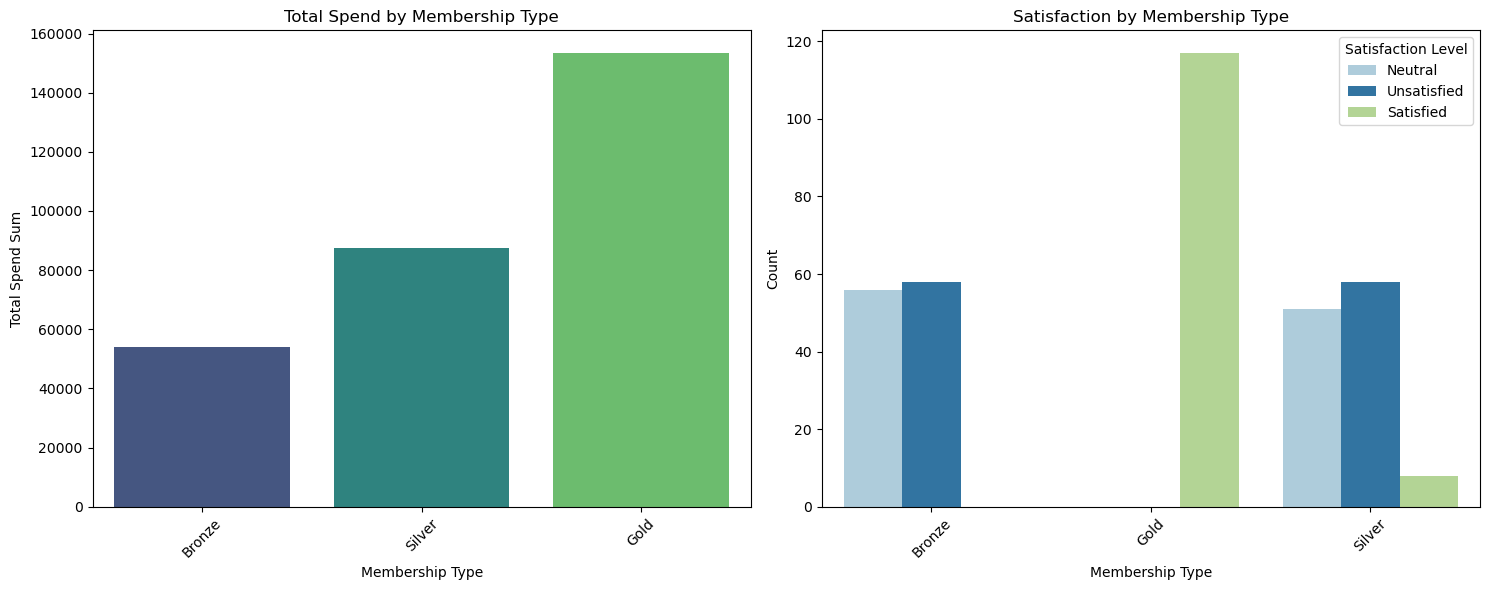

In [79]:
# Group by "Membership Type" and calculate the sum of "Total Spend"
membership_spend = (
    df.group_by("Membership Type")
    .agg(pl.col("Total Spend").sum().alias("Total Spend Sum"))
    .sort("Total Spend Sum")
)


membership_satisfaction = (
    df.group_by(["Membership Type", "Satisfaction Level"])
    .agg(pl.len().alias("count"))
    .sort(["Membership Type", "Satisfaction Level"])
)

# Create subplots for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Total Spend by Membership Type
sns.barplot(data=membership_spend, x="Membership Type", y="Total Spend Sum", hue="Membership Type",palette="viridis", ax=axes[0])
axes[0].set_title("Total Spend by Membership Type")
axes[0].set_xlabel("Membership Type")
axes[0].set_ylabel("Total Spend Sum")
axes[0].tick_params(axis='x', rotation=45)

# Plot Satisfaction Level counts by Membership Type
sns.barplot(data=membership_satisfaction, x="Membership Type", y="count", hue="Satisfaction Level", palette="Paired", ax=axes[1])
axes[1].set_title("Satisfaction by Membership Type")
axes[1].set_xlabel("Membership Type")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

**Observation:** People with better plan tends to spend more and people with better plans are more satisfied with their purchase.

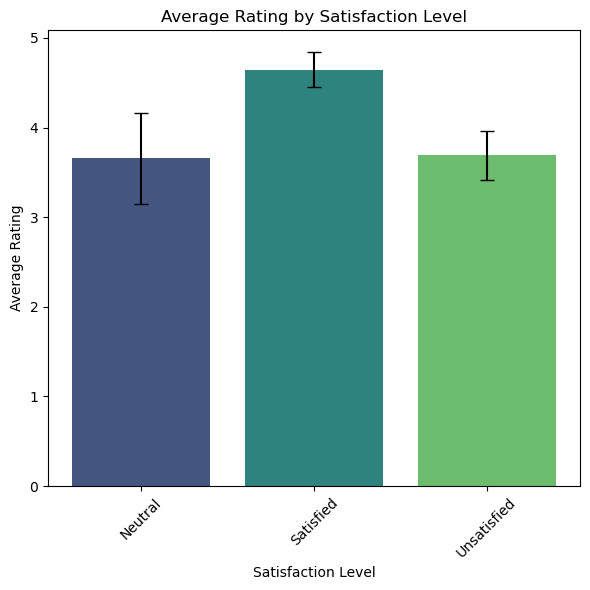

In [101]:
# Group by Satisfaction Level and calculate mean and standard deviation of Average Rating
rating_stats = (
    df.group_by("Satisfaction Level")
    .agg(
        [
            pl.col("Average Rating").mean().alias("Average Rating"),
            pl.col("Average Rating").std().alias("Rating Std")
        ]
    )
    .sort("Satisfaction Level")
)

plt.figure(figsize=(6, 6))
sns.barplot(data=rating_stats, x="Satisfaction Level", y="Average Rating", hue="Satisfaction Level", palette="viridis")
for row in rating_stats.iter_rows():
    plt.errorbar(x=row[0], y=row[1], yerr=row[2], fmt='none', c='black', capsize=5)
plt.title("Average Rating by Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:** Clients that were neutral had similar average rating as unsatisfied clients, but with higher standard deviation.

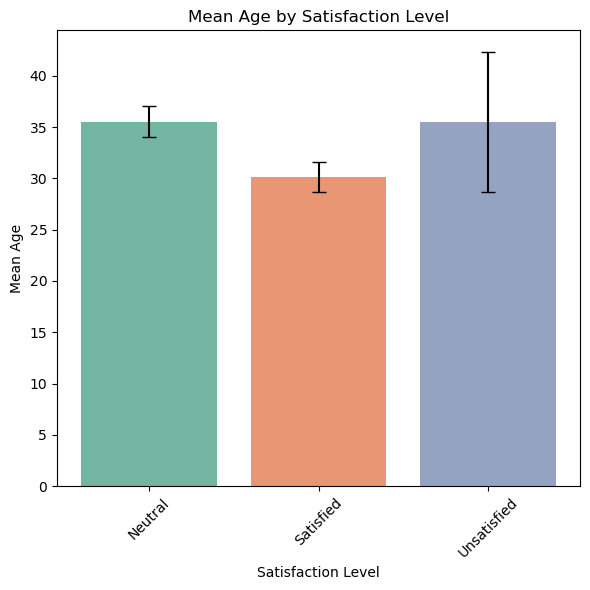

In [117]:
# Analyze how satisfaction levels depend on age
satisfaction_age = (
    df.group_by(["Satisfaction Level"]).agg([
        pl.col("Age").mean().alias("Mean Age"),
        pl.col("Age").std().alias("Age Std")
    ]).sort("Satisfaction Level")
)

plt.figure(figsize=(6, 6))
sns.barplot(data=satisfaction_age, x="Satisfaction Level", y="Mean Age", hue="Satisfaction Level", palette="Set2")
for row in satisfaction_age.iter_rows():
    plt.errorbar(x=row[0], y=row[1], yerr=row[2], fmt='none', c='black', capsize=5)
plt.title("Mean Age by Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Mean Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()